In [69]:
from astropy.io import fits
import os
from spotfinder import spotfinder
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import math
# import sys 
# sys.path.append("/data/common/software/products/")
import sbigCam as sbc
import time
import pandas as pd
from scipy.stats import norm
import matplotlib.colors as mcolors
plt.rcParams.update({"figure.dpi":130})
# import circle_fit as cf

## Handlers 

In [75]:
def find_spot(fitsname, fitspath,  
              expected_spot_count=1, 
              regionsname='regions.reg', 
              verbose=False):
    """
    spotfinder handler
    input:
        fitsname:
        fitspath (str): relative or full path to the folder
        regionsname (str):
        verbose (bool):
    output: 
        centroids (dict): raw output from spotfinder

    """
    assert isinstance(fitsname, str)

    _ifn = f"{fitspath}/{fitsname}"

    if expected_spot_count != 1:
        raise NotImplementedError("This mode wasn't tested here")
    try: 
        sf=spotfinder.SpotFinder(_ifn, expected_spot_count)
        centroids = sf.get_centroids(print_summary = verbose, 
                                     region_file=regionsname)
        if verbose: print(centroids)
    
    except: #ignore photo if an error is raised
        print("Warning: spot not found ")
        inval_number = np.nan
        return {  'peaks': [inval_number], 
                      'x': [inval_number], 
                      'y': [inval_number], 
                   'fwhm': [inval_number], 
                 'energy': [inval_number]} 
    return centroids


def collect_xy(files, picspath):
    # treating for single file
    if isinstance(files, str):
        files = [files]
    x2, y2 = [],[]
    for fullname in files:
        iname = fullname.split('/')[-1]
        _c = find_spot(iname, picspath)
        #todo, flatten x, y,
        x2.append(_c['x'][0])
        y2.append(_c['y'][0])
    return x2, y2

In [82]:
def format_img(plt):

    plt.colorbar(label ='Photo ID')
    plt.title('Detected spots')
    plt.xlabel('X coordinate (pix)')
    plt.ylabel('Y coordinate (pix)')
    plt.gca().invert_yaxis()

    plt.axis('equal')
    plt.show()
    

In [51]:
find_spot(testfiles[0], 'sbigpics/20221212-172028/')

Edge hot spot
Edge hot spot
peak = 83928.72879623307 brightness appears out of expected range
here


{'peaks': [83928.72879623307],
 'x': [1099.5330746797667],
 'y': [877.6762076818566],
 'fwhm': [3.9569108299716342],
 'energy': [5.067498221096617]}

In [47]:
testfiles=!ls sbigpics/29Nov202210_38_06/*fits
testfiles=!ls sbigpics/20221212-172028/
testfits = testfiles[1]
testfiles, testfits

(['20221212-172028.fits',
  '20221212-172036.fits',
  '20221212-172044.fits',
  '20221212-172052.fits'],
 '20221212-172036.fits')

### unit test:


In [46]:
path_val = "sbigpics/20221212-172028/"
ifn_val = "20221212-172028.fits"
spotfinder_val = {'peaks': [83928.72879623307], 
                      'x': [1099.5330746797667], 
                      'y': [877.6762076818566], 
                   'fwhm': [3.9569108299716342], 
                 'energy': [5.067498221096617]}

res = find_spot(ifn_val, path_val, expected_spot_count=1) 

assert res== spotfinder_val, "Error in results"

Edge hot spot
Edge hot spot
peak = 83928.72879623307 brightness appears out of expected range
here


In [15]:
res

{'peaks': [83928.72879623307],
 'x': [1099.5330746797667],
 'y': [877.6762076818566],
 'fwhm': [3.9569108299716342],
 'energy': [5.067498221096617]}

# Test arc 

In [86]:
root = 'sbigpics/testarc/'
files = !ls '{root}'

files
x,y = collect_xy(files, root)

Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 73429.16174515795 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 72855.3913041894 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 71519.86683703448 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 70578.28658909236 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 69691.22480740737 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 75850.8315917966 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 72183.8412698017 bright

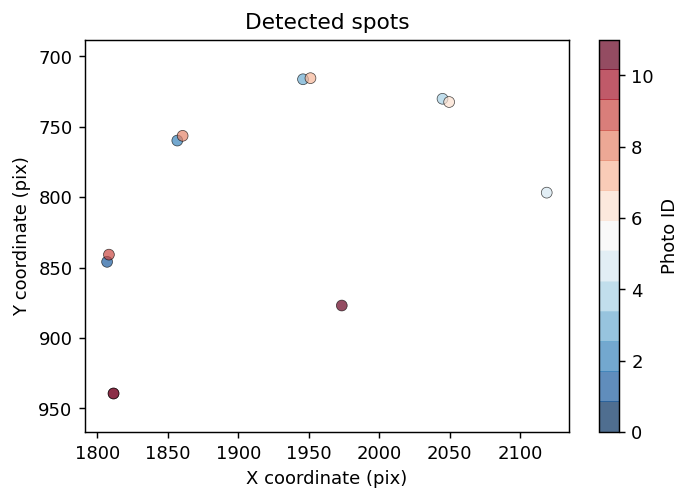

In [87]:

cmap = plt.cm.get_cmap("RdBu_r", len(x)+1)
plt.scatter(x[:], y[:], c=np.arange(len(x)), 
            cmap=cmap, 
            edgecolor='k', linewidth=0.4, alpha=0.7)
format_img(plt)

# saving 

In [79]:
xflatten = np.array([i[0] for i in x])
yflatten = np.array([i[0] for i in y])

In [80]:
session_lbl='test_savespot'
file = open(f"{session_lbl}.csv", 'w')
for ix, iy in zip(xflatten,yflatten):
    print(ix, iy)
    file.write(f"{ix} {iy}\n")
file.close()

1811.4864033493266 939.4166267012608
1806.9010046933593 845.9371324405779
1856.748417532216 759.8414715894679
1945.9918660041722 716.3147531185626
2045.0413266017797 730.1676941892483
2119.024318426958 796.8152554497041
2049.7428760049875 732.4642570840178
1951.285063075784 715.536909568173
1860.5300254772062 756.4589058692003
1808.2046965337809 840.829341987301
1811.477919537307 939.403362561772
1973.5244281532694 876.953654371503


In [91]:
ff = fits.getdata("sbigpics/curreposition/20230201-114451.fits")
find_spot("20230201-114451.fits", "sbigpics/curreposition/")

Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 78575.0264808495 brightness appears out of expected range
here


{'peaks': [78575.0264808495],
 'x': [1972.7341757826825],
 'y': [877.1064515692935],
 'fwhm': [3.5166109917819997],
 'energy': [4.216339388145526]}

22
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 78915.76573291933 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 73284.29316206879 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 73325.29841595024 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 74367.51998432691 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 73764.0599124732 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 73224.46143955286 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spo

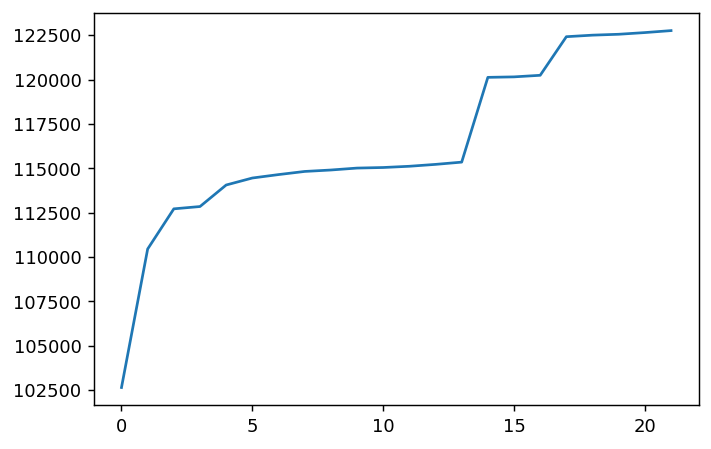

In [124]:
files = !ls sbigpics/curreposition/
plt.plot([int(i.replace('.fits','').split('-')[-1]) for i in files])
print(len(files))
x, y = collect_xy(files[13:], 'sbigpics/curreposition/'          )

(1066.0, 704.0)

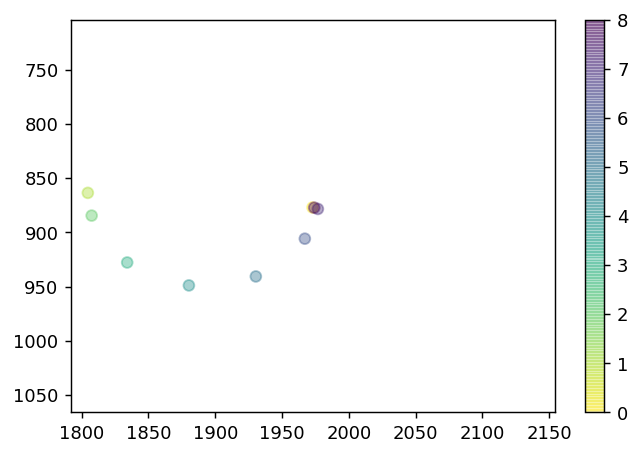

In [125]:
xc, yc = (1973, 885)
r = 171+10


plt.scatter(x,y,c = range(len(x)), cmap='viridis_r', alpha=0.4); plt.colorbar()
plt.xlim(xc-r,xc+r)
plt.ylim(yc+r, yc-r)

